%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100
InteractiveShell.ast_node_interactivity = "all"

In [6]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100
InteractiveShell.ast_node_interactivity = "all"

In [7]:
# This is a temporary read-only OpenML key. Replace with your own key later. I replaced it with my own key
oml.config.apikey = '34325f4de4802e144a8862476d72d8b9'

Class label: 9


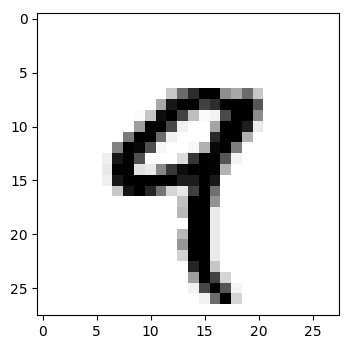

In [8]:
mnist_data = oml.datasets.get_dataset(554) # Download MNIST data
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute); # Get the predictors X and the labels y
plt.imshow(X[4].reshape(28, 28), cmap=plt.cm.gray_r) # Take the first example, reshape to a 28x28 image and plot
print("Class label:",y[4]) # Print the correct class label

The predictive accuracy of the model is 0.97. It takes about 20 minutes to calculate this. 


In [9]:
#test set accuracy is 0.97 btw for the whole set that took 20 minutes or so to calculate

from sklearn.model_selection import train_test_split # Importing splitting function to train and test model
from sklearn.neighbors import KNeighborsClassifier   # Import kNN function

X, y = mnist_data.get_data(target=mnist_data.default_target_attribute)      

#Only a small sample from X and y
X_light = X[:1000]
y_light = y[:1000]

X_train, X_test, y_train, y_test = train_test_split(X_light, y_light, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
#Getting the score of our model on the test data.
print("Score: {:.2f}".format(knn.score(X_test, y_test)))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Score: 0.87


For some reason the code in the cell below acts differently at different times. It is supposed to show various cases where the 
model failed by using a for loop, but something if off here and I do not know what exactly. 
Maybe you need to run the above cell right before running this cell in order for this code to work, but that is annoying
because that takes around 20 minutes. Furthermore, it only shows the last picture that is being generated.

In [11]:
#Finding a few misclassification. This code only shows the last image with the correct label, but does not show the other 5.
#For some reason this does not work anymore while it first did work :(. 
#Maybe you need to run the above cell right before running this cell in order for this code to work
j = 0
y_pred = knn.predict(X_test)

for i in range(5):  #Take a look at 6 misclassifications
    if y_pred[j] != y_test[j]: 
        plt.imshow(X[j].reshape(28, 28), cmap=plt.cm.gray_r)
        print("Class label:",y[j])
        i += 1
        j += 1
    else:
        j += 1

print("Hello")

Hello


Using 10 fold crossvalidation a plot is made that shows the misclassficiation rate against the value of k.
It shows that rather quickly the model starts to underfit and is too simplistic, because at larger values of k the model starts performing worse quite quickly. The optimal k is around 1 or 2. 

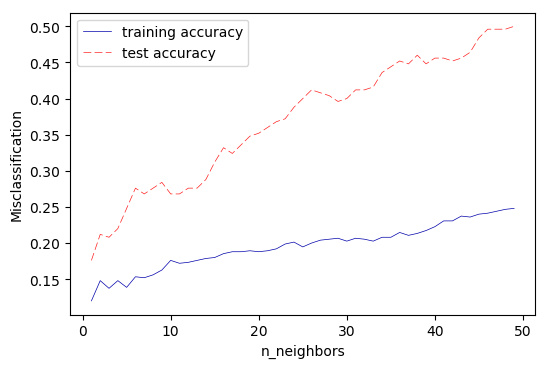

In [12]:
from sklearn.model_selection import KFold #Import function to do stratified cross validation
from sklearn.model_selection import cross_val_score #Import CV function

#I am importing this so that we can run this code without the running the other code that takes very long.
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute)
#Making a subset. This needs to be 70000 for the final calculations but for now 700 will do for testing I think
#NEEDS TO BE 70000 for final answer!!!!!!
X_smal = X[:1000]
y_smal = y[:1000]

#So instead of the whole nmist data-set we only use the first 700 cases
X_train, X_test, y_train, y_test = train_test_split(X_smal, y_smal, random_state=0)

# Build a list of the training and test scores for increasing k to use this to make a plot later on
training_accuracy = []
test_accuracy = []

# testing 1 to 10 nearest neighbours
k = range(1, 50)   

#This line makes 10 cross validation pieces. I think that the shuffle prevents having one class in one fold which would mess up  
#the model.But now I am assuming that the first 700 cases that we use from the nmist set have already a random distribution of numbers.
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

for n_neighbors in k:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # record training and test set accuracy
    train_score = cross_val_score(clf, X_train, y_train, cv=kfold)
    test_score = cross_val_score(clf, X_test, y_test, cv=kfold)
    #This piece of code is here so that only 1 value is given to the list instead of 10
    train_score_average = 1-(train_score.mean()) # The 1 minus part is added to get the misclassifications instead of the correct classifications
    test_score_average = 1-(test_score.mean())
    training_accuracy.append(train_score_average)
    test_accuracy.append(test_score_average)

#Plotting the graph
plt.plot(k, training_accuracy, label="training accuracy")
plt.plot(k, test_accuracy, label="test accuracy")
plt.ylabel("Misclassification")
plt.xlabel("n_neighbors")
_ = plt.legend()



Now using 100 bootstrap repeats instead of 10 fold crossvalidation. The plot obtained here shows that the misclassifications curve are more fluent, but still show similair behavior in the sense that a larger k value leads to more misclassifications.
The optimal k value is again around 1 or 2.

In [22]:
#Now doing the same as before but now with 100 bootstrapping repeats.
from sklearn.model_selection import ShuffleSplit #Need this to do the shuffle
from sklearn.model_selection import cross_val_score #Import CV function
from sklearn.neighbors import KNeighborsClassifier   # Import kNN function



#I am importing this so that we can run this code without the running the other code that takes very long.
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute)
#Making a subset. This needs to be 7000 for the final calculations but for now 700 will do for testing I think
#NEEDS TO BE 7000 for final answer!!!!!!
X_small = X[:700]
y_small = y[:700]


#So instead of the whole nmist data-set we only use the first 700 cases by typing X_smal and y_smal
#However I am not sure if this needs to be here since bootstrapping is getting training and testing data differently
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, random_state=0)

# Build a list of the training and test scores for increasing k to use this to make a plot later on
training_accuracy = []
test_accuracy = []

# testing 1 to 10 nearest neighbours
k = range(1, 50)  

# I am assuming that n_splits stand for 100 repeats. This is the distinction from the previous cell
shuffle_split = ShuffleSplit(test_size=.34, train_size=.66, n_splits=100) 

for n_neighbors in k:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # record training and test set accuracy
    train_score = cross_val_score(clf, X_train, y_train, cv=shuffle_split)
    test_score = cross_val_score(clf, X_test, y_test, cv=shuffle_split)
    #This piece of code is here so that only 1 value is given to the list instead of 10
    train_score_average = 1-(train_score.mean()) # The 1 minus part is added to get the misclassifications instead of teh correct classifications
    test_score_average = 1-(test_score.mean())
    training_accuracy.append(train_score_average)
    test_accuracy.append(test_score_average)


#Plotting the graph
plt.plot(k, training_accuracy, label="training accuracy")
plt.plot(k, test_accuracy, label="test accuracy")
plt.ylabel("Misclassification")
plt.xlabel("n_neighbors")
_ = plt.legend()

KeyboardInterrupt: 

Running both the logistic regression as the linear SVM's with the default parameter settings. 
This takes also quite a long time to caculate so be aware when running. 
On 10000 data points: Logistic regression is :Training set score: 0.997 and Test set score: 0.840
Linear SVM is : Training set score: 0.968. Test set score: 0.833

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#I am importing this so that we can run this code without the running the other code that takes very long.
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute)
#Making a subset. This cell need to run on the whil data set for the final answer
X_small = X[:1000]
y_small = y[:1000]

X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, random_state=0)

#Making the logistic regression model and printing it
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

#Making the linear SVM model and printing out the scores
linear_svm = LinearSVC().fit(X_train, y_train)
print("Training set score: {:.3f}".format(linear_svm.score(X_train, y_train)))
print("Test set score: {:.3f}".format(linear_svm.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.880
Training set score: 1.000
Test set score: 0.864


I am not sure whether i have made the correct plot for this. It does not look very interesting.

Training accuracy of L1 logreg with C=0.001: 0.90
Test accuracy of L1 logreg with C=0.001: 0.86
Training accuracy of L2 logreg with C=0.001: 1.00
Test accuracy of L2 logreg with C=0.001: 0.88
Training accuracy of L1 logreg with C=0.010: 1.00
Test accuracy of L1 logreg with C=0.010: 0.87
Training accuracy of L2 logreg with C=0.010: 1.00
Test accuracy of L2 logreg with C=0.010: 0.88
Training accuracy of L1 logreg with C=0.100: 1.00
Test accuracy of L1 logreg with C=0.100: 0.88
Training accuracy of L2 logreg with C=0.100: 1.00
Test accuracy of L2 logreg with C=0.100: 0.88
Training accuracy of L1 logreg with C=1.000: 1.00
Test accuracy of L1 logreg with C=1.000: 0.86
Training accuracy of L2 logreg with C=1.000: 1.00
Test accuracy of L2 logreg with C=1.000: 0.88
Training accuracy of L1 logreg with C=10.000: 1.00
Test accuracy of L1 logreg with C=10.000: 0.88
Training accuracy of L2 logreg with C=10.000: 1.00
Test accuracy of L2 logreg with C=10.000: 0.87
Training accuracy of L1 logreg with 

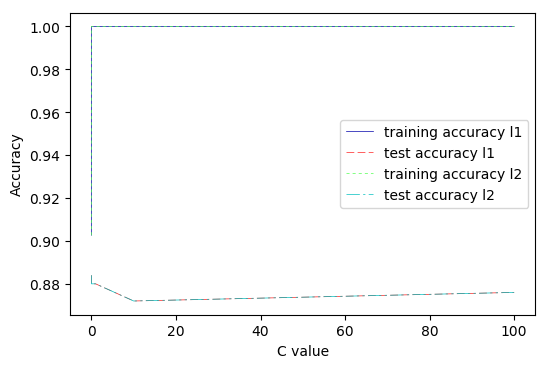

In [25]:
from sklearn.linear_model import LogisticRegression

#I am importing this so that we can run this code without the running the other code that might take a long time.
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute)
#Making a subset. This cell need to run on the whil data set for the final answer
X_small = X[:1000]
y_small = y[:1000]

l1_training_accuracy = []
l1_test_accuracy = []
l2_training_accuracy = []
l2_test_accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, random_state=0)

#Iterating through different values for C and printing out these scores for these different values
numbers = [0.001, 0.01, 0.1, 1, 10, 100] # Can always add more values for C if needed
for C in numbers:
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    lr_l1_train_score = lr_l1.score(X_train, y_train)
    lr_l1_test_score = lr_l1.score(X_test, y_test)
    print("Training accuracy of L1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1_train_score))
    print("Test accuracy of L1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1_test_score))
    lr_l2 = LogisticRegression(C=C, penalty="l2").fit(X_train, y_train)
    lr_l2_train_score = lr_l2.score(X_train, y_train)
    lr_l2_test_score = lr_l2.score(X_test, y_test)
    print("Training accuracy of L2 logreg with C={:.3f}: {:.2f}".format(C, lr_l2_train_score))
    print("Test accuracy of L2 logreg with C={:.3f}: {:.2f}".format(C, lr_l2_test_score))
    #Putting the calculated score in the arrays 
    l1_training_accuracy.append(lr_l1_train_score)
    l1_test_accuracy.append(lr_l1_test_score)
    l2_training_accuracy.append(lr_l2_train_score)
    l2_test_accuracy.append(lr_l2_test_score)
   
#Potting the graph
plt.plot(numbers, l1_training_accuracy, label="training accuracy l1")
plt.plot(numbers, l2_test_accuracy, label="test accuracy l1")
plt.plot(numbers, l1_training_accuracy, label="training accuracy l2")
plt.plot(numbers, l2_test_accuracy, label="test accuracy l2")
plt.ylabel("Accuracy")
plt.xlabel("C value")
#plt.ylim(0.5, 1)
_ = plt.legend()